# <span style="color:blue;">**Logistic Regression**</span>

### Use Case: Logistic Regression
### Note: At first, with the help of a use case, we are going to perform all the basic steps to reach the training and predicition part.

### Problem Statement
#### One of the aspects Seattle is most notable for, in addition to coffee, grunge, and electronic businesses, is its rains. From January 1, 1948 to December 12, 2017, this dataset provides full records of Seattle's daily rainfall patterns.

#### Dataset
#### seattleWeather_1948-2017.csv


## Data Dictionary
#### Following are the variables with their definition and key:

### Variables:	Description
### DATE: The date of the observation
### PRCP: The amount of precipitation, in inches
### MAX: The maximum temperature for that day, in degrees Fahrenheit
### TMIN: The minimum temperature for that day, in degrees Fahrenheit
### RAIN: TRUE if rain was observed on that day, FALSE if it was not



#### Import Libraries
#### Pandas is a Python library for data manipulation and analysis.
#### NumPy is a package that contains a multidimensional array object and several derived ones.
##### Matplotlib is a Python visualization package for 2D array plots.
#### Seaborn is built on top of matplotlib. It's used for exploratory data analysis and data visualization.
#### To work with dates as date objects, use Datetime.


In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

In [2]:
#loading the dataset
data = pd.read_csv('seattleWeather_1948-2017.csv')

In [3]:
#preview the information on the first 5 weather conditions
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
#viewing the last 5 records
data.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [5]:
#checking the shape of data
data.shape

(25551, 5)

In [6]:
#check the features
data.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

In [7]:
#getting the basic information about our data to get idea on missing values per column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [8]:
#getting the summary statistics of all the numerical features in our data to identify null-values and outliers.
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [9]:
#going for a missing value check
data.isna().sum(axis=0)

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

### Finding and treating missing values

#### To make the data trainable we have to get rid of missing values--we can do a missing value treatment in 2 ways

##### 1) Substituting the null values with the <span style="color:red;">median</span>  or mean---<span style="color:red;">median</span> is preferred in case of outliers, <span style="color:blue;">mode</span> imputation is also done in case of categorical variables

##### 2) Drop missing values in case <30% of the data is missing as per industry standards

In [10]:
# finding the rows having null values in the 'PRCP' column
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [11]:
# finding the rows having null values in the 'RAIN' column
data[pd.isnull(data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


<Axes: xlabel='RAIN', ylabel='count'>

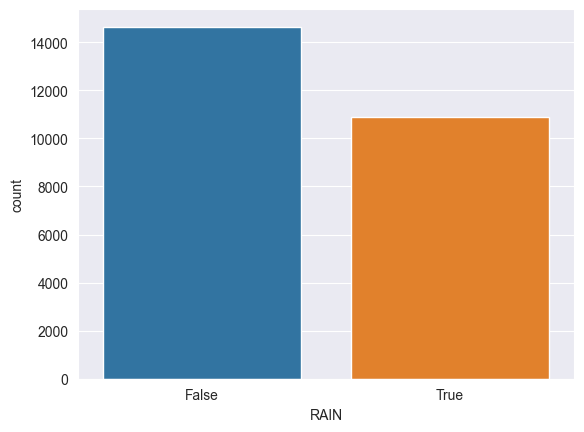

In [12]:
#plot a graph to determine the chances of rain
sns.set_style('darkgrid')
sns.countplot(data=data,x='RAIN')

In [13]:
### we can see from the figure above that there are less chances of rain.

##### As RAIN  is a categorical variable,we can impute the missing values with the mode. But precipitation being a continuous variable,we need to impute the missing values with the mean value of PRCP

In [14]:
#computing the mean of 'PRCP'
data['PRCP'].mean()

0.10622162204477847

#### Creating a custom function to determine the chances of rain

In [15]:
def RAIN_IMPUTATION(col):
    RAIN=col[0] #in the argument the first index will store the value of rain
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN

#### Creating a custom function for 'Precipitation'

In [16]:
def PRCP_IMPUTATION(col1):
    PRCP=col1[0]
    if pd.isnull(PRCP):
        return data['PRCP'].mean()
    else:
        return PRCP

In [17]:
#applying the function to impute the na's in rain column
data['RAIN']=data[['RAIN']].apply(RAIN_IMPUTATION,axis=1)

In [18]:
#applying the customised function for imputing missing values in PRCP column
data['PRCP']=data[['PRCP']].apply(PRCP_IMPUTATION,axis=1)

#### When we apply a method with a single square bracket on a column of a dataframe,the output will be a pandas series. But when we use two square brackets the output will be a dataframe. As in this case,we are just imputing the missing values in the selected columns and retaining the original values and structure,we want the output to remain a dataframe.So,we use a double box bracket when we apply the customised function.

In [19]:
#Now we will check if the function works

In [20]:
data.isna().sum(axis=0)

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

## EDA-

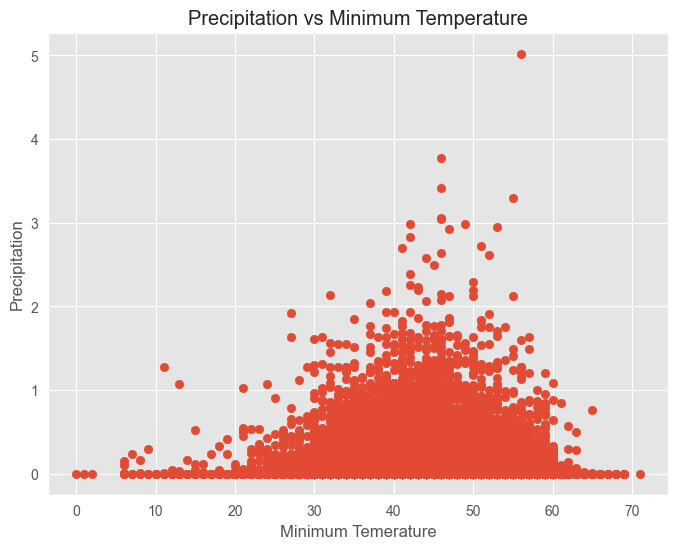

In [21]:
#studing the relationship between precipitation and minimum temperature
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.scatter(x='TMIN',y='PRCP',data=data)
plt.xlabel('Minimum Temerature')
plt.ylabel('Precipitation')
plt.title('Precipitation vs Minimum Temperature')
plt.show()

In [22]:
### The above graph shows that within the minimum  temperature of 28-58 degrees,the amount of precipitation increases.

### Determine the correlation between TMAX and precipitation

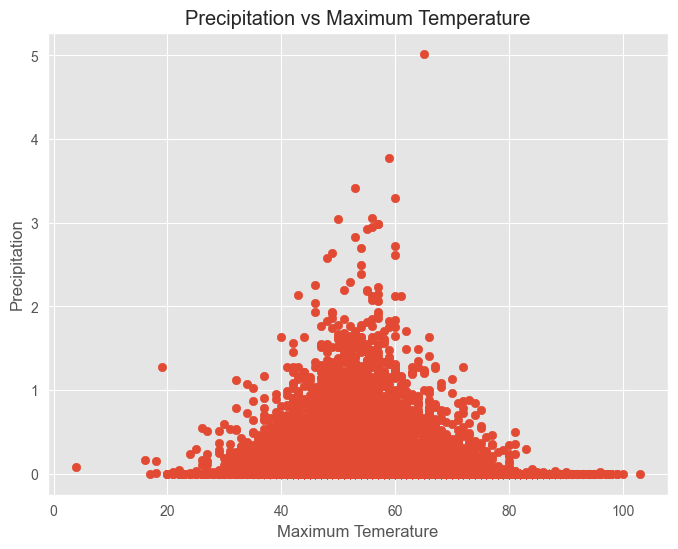

In [23]:
#studing the relationship between precipitation and maximum temperature
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.scatter(x='TMAX',y='PRCP',data=data)
plt.xlabel('Maximum Temerature')
plt.ylabel('Precipitation')
plt.title('Precipitation vs Maximum Temperature')
plt.show()

In [24]:
## The graph shows that precipitation increases between the maximum temperature of 30 and 80 degrees

### Univariate Analysis

C:\Users\Deepak Yadav\AppData\Local\Temp\ipykernel_25720\404525056.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TMIN'])


<Axes: xlabel='TMIN', ylabel='Density'>

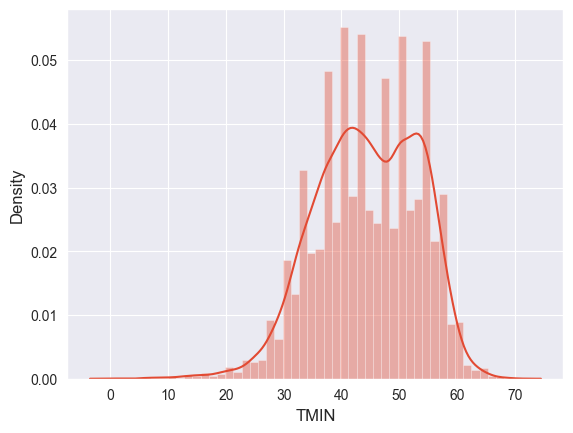

In [25]:
#plot a graph to determine the overall distribution of minimum temperture
sns.set_style('darkgrid')
sns.distplot(data['TMIN'])

In [26]:
#THE GRAPH SHOWS INCREASING DENSITY WHEN THE MINIMU TEMPERATURE IS BETWEEN 30-55 DEGREES.

C:\Users\Deepak Yadav\AppData\Local\Temp\ipykernel_25720\3085380802.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TMAX'])


<Axes: xlabel='TMAX', ylabel='Density'>

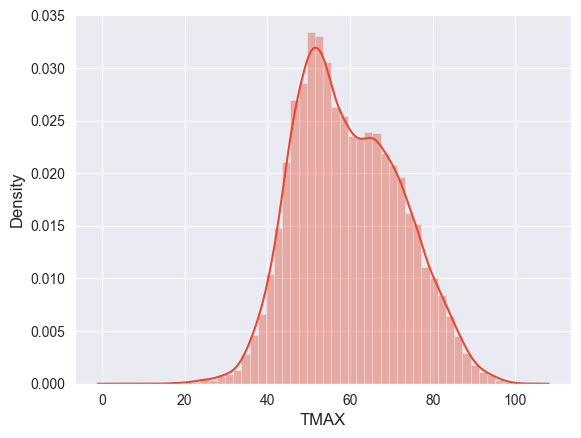

In [27]:
#plot a graph to determine the overall distribution of maximum temperture
sns.set_style('darkgrid')
sns.distplot(data['TMAX'])

In [28]:
#THE GRAPH SHOWS INCREASING DENSITY WHEN THE TEMPERATURE IS BETWEEN 40 AND 55 DEGREES

C:\Users\Deepak Yadav\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


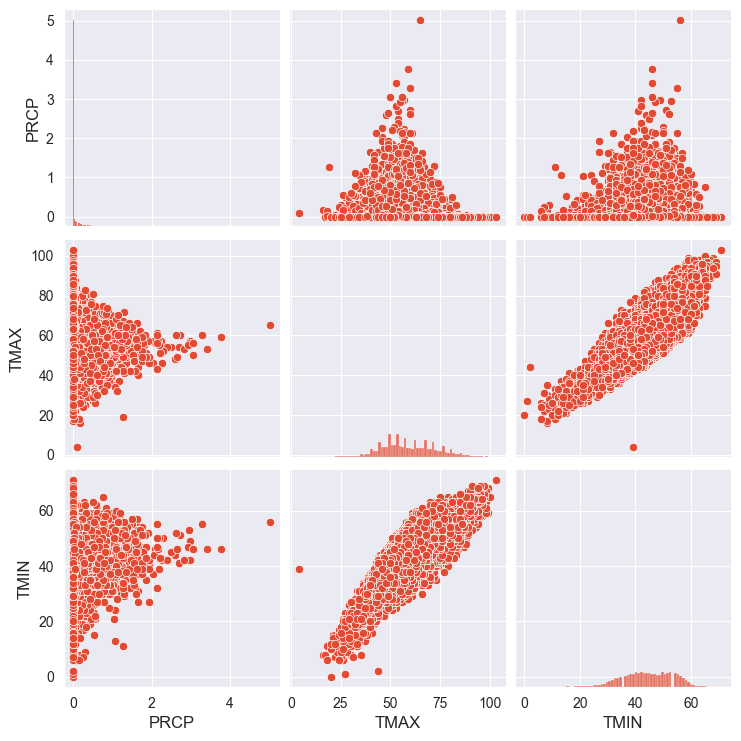

In [29]:
#plotting the bivariate and univariate relationships together within the same frame.
sns.set_style('darkgrid')
sns.pairplot(data=data)

### Using boxplots to detect outliers in Tmax,Tmin

<Axes: >

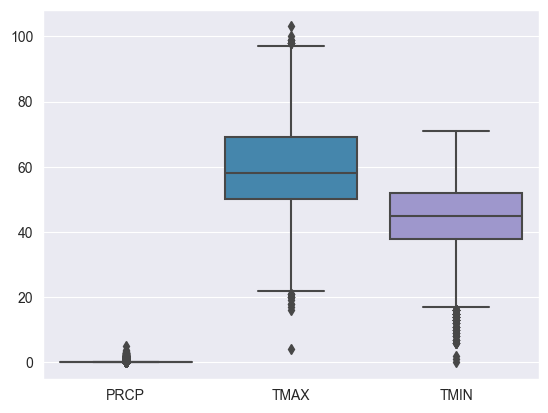

In [30]:
sns.set_style('darkgrid')
sns.boxplot(data=data)

In [31]:
#dropping outliers from TMIN column
data=data.drop(data[data['TMIN']<18].index)

In [32]:
#dropping outlier values from TMAX
data = data.drop(data[(data['TMAX']>97)|(data['TMAX']<21)].index)

<Axes: >

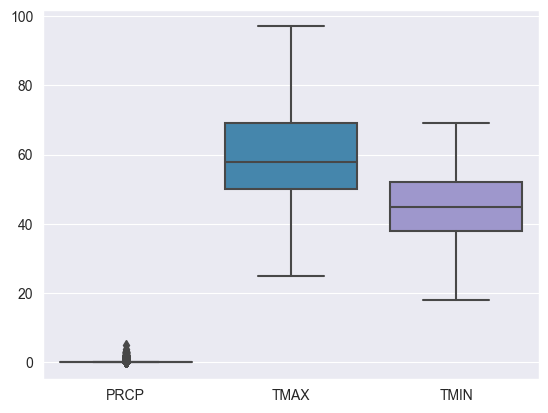

In [33]:
sns.set_style('darkgrid')
sns.boxplot(data=data)

In [34]:
#importing logistic regression model

from sklearn.linear_model import LogisticRegression

In [35]:
lgr= LogisticRegression()

In [36]:
#creating the subsets
from sklearn.model_selection import train_test_split

In [37]:
X = data.drop(['RAIN','DATE'],axis=1)
y = data['RAIN']
y = y.astype('str')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
#fitting the training data to our model object
lgr.fit(X_train,y_train).score(X_train,y_train)

0.9281922736655853

In [39]:
#now fitting the model in test data
predictions = lgr.predict(X_test)

In [40]:
# finding the test accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy

0.9319834873206212